# Cadeira: Ciência de dados

## Carregando bibliotecas

In [2]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando dados

In [8]:
df_dados = pd.read_csv('train.csv')

df_dados = df_dados.sample(frac=1)

df_dados.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.75,NaN,Q
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.50,B69,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.10,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.05,NaN,S


# 2. Análise Exploratória

## 2.1 Informações dos dados

In [42]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 593 to 212
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [51]:
df_dados['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [44]:
df_dados['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [65]:
df_dados['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 2.2 Probabilidade de homens e mulheres sobreviventes

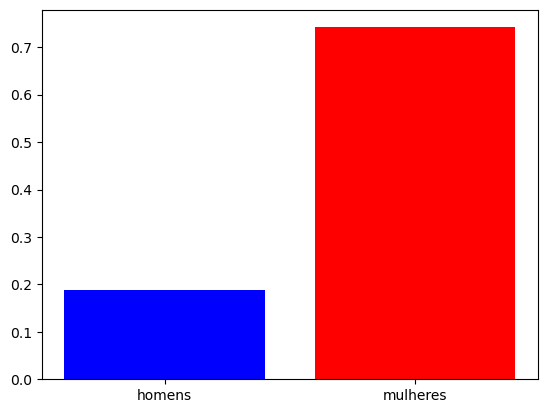

In [64]:
df_dados_male_survived = df_dados[(df_dados['Sex'] == 'male') & (df_dados['Survived'] == 1)]
df_dados_female_survived = df_dados[(df_dados['Sex'] == 'female') & (df_dados['Survived'] == 1)]

quant_male = len(df_dados[df_dados['Sex'] == 'male'])
quant_female = len(df_dados[df_dados['Sex'] == 'female'])

prob_male_survived = len(df_dados_male_survived) / quant_male
prob_female_survived = len(df_dados_female_survived) / quant_female

plt.bar(['homens', 'mulheres'], [prob_male_survived, prob_female_survived], color=['blue', 'red'])

plt.show()

## 2.3 Sobreviventes por classe de ingresso

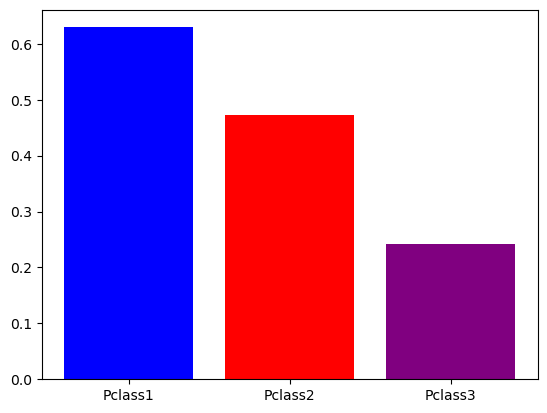

In [62]:
df_dados_survived_pclass1 = df_dados[(df_dados['Pclass'] == 1) & (df_dados['Survived'] == 1)]
df_dados_survived_pclass2 = df_dados[(df_dados['Pclass'] == 2) & (df_dados['Survived'] == 1)]
df_dados_survived_pclass3 = df_dados[(df_dados['Pclass'] == 3) & (df_dados['Survived'] == 1)]

quant_pclass1 = len(df_dados[df_dados['Pclass'] == 1])
quant_pclass2 = len(df_dados[df_dados['Pclass'] == 2])
quant_pclass3 = len(df_dados[df_dados['Pclass'] == 3])

prob_survived_pclass1 = len(df_dados_survived_pclass1) / quant_pclass1
prob_survived_pclass2 = len(df_dados_survived_pclass2) / quant_pclass2
prob_survived_pclass3 = len(df_dados_survived_pclass3) / quant_pclass3

plt.bar(['Pclass1', 'Pclass2', 'Pclass3'], [prob_survived_pclass1, prob_survived_pclass2, prob_survived_pclass3], color=['blue', 'red', 'purple'])

plt.show()

## 2.4 Sobreviventes por pontos de embarque (C, Q ou S)